<a href="https://colab.research.google.com/github/LaraBBrum/coursera-test/blob/master/ConstrucaodeRedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Import necessary libraries*

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG

*pip install pydot graphviz - if necessary*

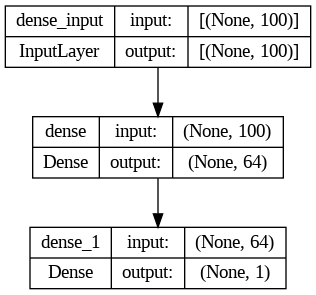

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Example of creating a sequential model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))

# Import and utilize the plot_model function
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

*Define:*
*   *image dimensions (row and columns in the image);*
*   *number of classes;*
*   *size of the test set (proportion of data to include in the test set);*
*   *random state for reproducibility (seed value for random number generation);*
*   *model parameters (number of epochs for training the model and samples per gradient update during training).*

In [ ]:
img_rows = 28
img_cols = 28
num_classes = 10
test_size = 0.2
random_state = 42
# Model
no_epochs = 25
batch_size_size = 32

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# Load the data directly from the Keras.datasets API
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create DataFrames for the training and testing data
train = pd.DataFrame({'label': train_labels})
train_images_list = [train_images[i].flatten() for i in range(len(train_images))]
train_images_df = pd.DataFrame(train_images_list)

test = pd.DataFrame({'label': test_labels})
test_images_list = [test_images[i].flatten() for i in range(len(test_images))]
test_images_df = pd.DataFrame(test_images_list)

# Concatenate the images and labels
train = pd.concat([train, train_images_df], axis=1)
test = pd.concat([test, test_images_df], axis=1)

# Check the shapes of the training and testing sets
print(train.shape, test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 785) (10000, 785)


*The function does:*
*   *convert labels to one-hot encoded format;*
*   *get the number of images in the dataset;*
*   *convert DataFrame to numpy array and exclude the label column;*
*   *reshape the data to match the input shape of the neural network model;*
*   *normalize pixel values to the range [0, 1];*
*   *return preprocessed input data and labels.*



In [ ]:
def data_preprocessing(raw):
    out_y = keras.utils.to_categorical(raw.label, num_classes)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

*List of class names corresponding to the labels in the Fashion MNIST dataset*

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

*   *Create a new figure with a specific size;*
*   *Loop through the first 36 images in the training set:*
    *   *add a subplot to the current figure grid (6 rows, 6 columns);*
    *   *remove ticks from both x and y axes;*
    *   *turn off grid lines;*
    *   *display the image using a grayscale colormap;*
    *   *set the label of the x-axis to the corresponding class name.*
*   *Display the figure.*



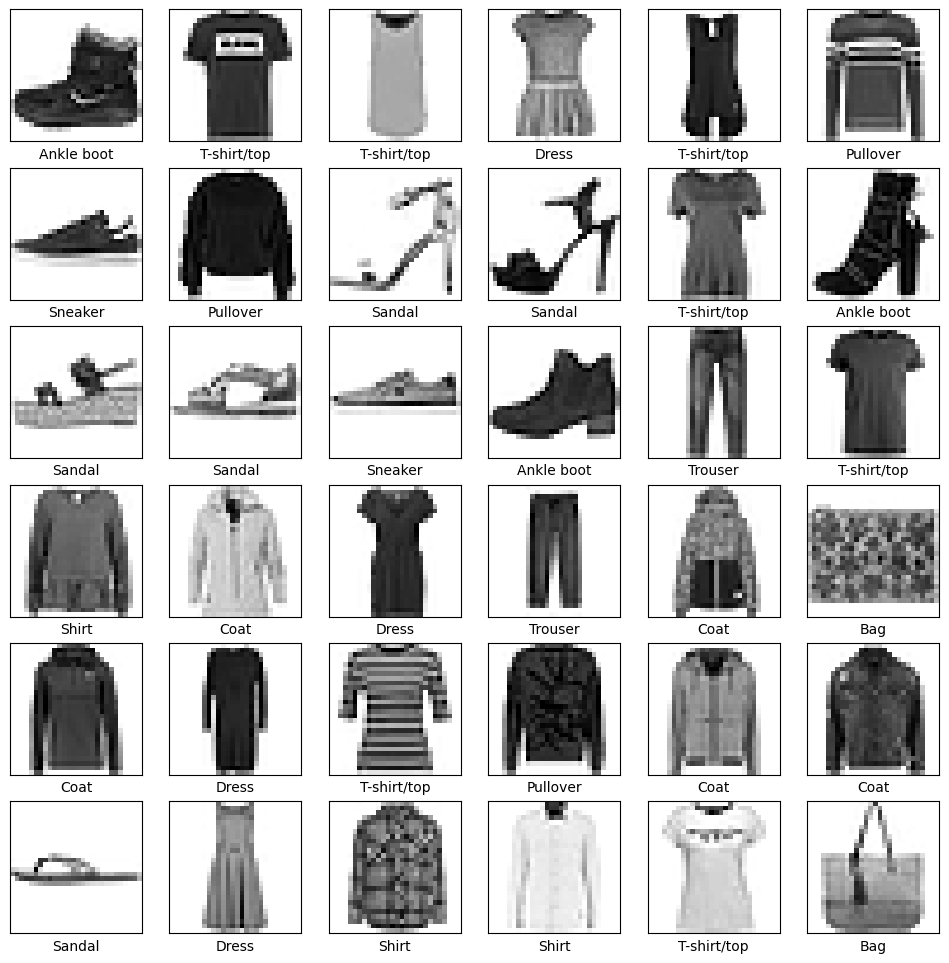

In [ ]:
plt.figure(figsize = (12, 12))

for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()



*   *Import the to_categorical function from keras.utils;*
*   *Define a function for data preprocessing:*
    *   *convert labels to one-hot encoded format;*
    *   *get the number of images in the dataset;*
    *   *extract pixel values and reshape them into the desired format;*
    *   *normalize pixel values to range [0, 1];*
    *   *return preprocessed input images and labels.*
*   *Preprocess the training data;*
*   *Preprocess the testing data;*
*   *Print the shapes of the preprocessed testing data.*





In [ ]:
from keras.utils import to_categorical

def data_preprocessing(raw):
    out_y = to_categorical(raw.label, num_classes)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

x, y = data_preprocessing(train)
test_images, test_labels = data_preprocessing(test)
print(test_images.shape, test_labels.shape)


(10000, 28, 28, 1) (10000, 10)


*   *Split the preprocessed training data into training and validation sets;*
*   *The 'test_size' parameter specifies the proportion of the dataset to include in the validation split*;
*   *The 'random_state' parameter sets the seed for random number generation, ensuring reproducibility*;
*   *x = input data (features);*
    
    *y = target labels*;
*   *test_size = size of the validation set;*
*   *random state = random seed for reproducibility.*

In [ ]:
train_images, x_val, train_labels, y_val = train_test_split(x, y, test_size=test_size, random_state=random_state)

* *Create a new figure for plotting;*
* *Display the first image from the training dataset;*
* *Add a colorbar to the plot;*
* *Turn off grid lines;*
* *Show the plot.*

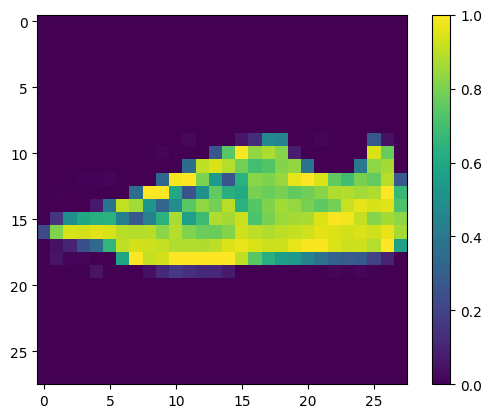

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

* *Feature-wise normalization: Divide inputs by std of the dataset;*
* *Range for random rotations: Degrees (0 to 180);*
* *Fraction of total width to shift randomly in horizontal direction;*
* *Fraction of total height to shift randomly in vertical direction;*
* *Randomly flip inputs horizontally;*
* *Apply ZCA whitening.*

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zca_whitening=True)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


*Fits the data generator to the training images.*
*This step is necessary before applying data augmentation to ensure that the transformations are consistent across the training dataset.*

In [ ]:
datagen.fit(train_images)

* *Model architecture;*
* *Add convolutional layers;*
* *Flatten, dense and output layer;*
* *Compile the model.*

In [ ]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu',padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(256,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(256,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="Adam",
              metrics=['accuracy'])

*Fit the model using data generator*

In [ ]:
model.fit_generator(datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=len(train_images) / 32, epochs=10)

<ipython-input-19-baf58563dbb0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(train_images, train_labels, batch_size=32),


Epoch 1/10
1500/1500 [==============================] - 1178s 783ms/step - loss: 1.0487 - accuracy: 0.6206
Epoch 2/10
1500/1500 [==============================] - 1165s 777ms/step - loss: 0.6808 - accuracy: 0.7450
Epoch 3/10
1500/1500 [==============================] - 1160s 773ms/step - loss: 0.5930 - accuracy: 0.7821
Epoch 4/10
1500/1500 [==============================] - 1166s 777ms/step - loss: 0.5550 - accuracy: 0.7967
Epoch 5/10
1500/1500 [==============================] - 1166s 777ms/step - loss: 0.5114 - accuracy: 0.8121
Epoch 6/10
1500/1500 [==============================] - 1147s 764ms/step - loss: 0.4914 - accuracy: 0.8215
Epoch 7/10
1500/1500 [==============================] - 1142s 761ms/step - loss: 0.4663 - accuracy: 0.8299
Epoch 8/10
1500/1500 [==============================] - 1144s 763ms/step - loss: 0.4489 - accuracy: 0.8359
Epoch 9/10
1500/1500 [==============================] - 1128s 752ms/step - loss: 0.4350 - accuracy: 0.8424
Epoch 10/10
1500/1500 [==============

*Print the shapes of different datasets*

In [ ]:
print("Fashion MNIST train -  rows:",train_images.shape[0]," columns:", train_images.shape[1:4])
print("Fashion MNIST valid -  rows:",x_val.shape[0]," columns:", x_val.shape[1:4])
print("Fashion MNIST test -  rows:",test_images.shape[0]," columns:", test_images.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

*Displaying the model summary*

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrap  (None, None, None, 64)    640       
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, None, None, 64)    36928     
 apper)                                                          
                                                                 
 batch_normalization (Batch  (None, None, None, 64)    256       
 Normalization)                                                  
                                                                 
 module_wrapper_2 (ModuleWr  (None, None, None, 64)    0         
 apper)                                                          
                                                                 
 module_wrapper_3 (ModuleWr  (None, None, None, 64)   

* *Setting up callbacks for reducing learning rate and early stopping;*
* *Training the model with specified parameters and callbacks.*

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)
earlystop=EarlyStopping(monitor='val_loss', patience=3)

train_model = model.fit(train_images, train_labels,
                  batch_size=batch_size_size,
                  epochs=no_epochs,
                  verbose=1,
                  validation_data=(x_val, y_val),callbacks=[reduce_lr])

Epoch 1/25
1500/1500 [==============================] - 1135s 757ms/step - loss: 0.2823 - accuracy: 0.8975 - val_loss: 0.2952 - val_accuracy: 0.8882 - lr: 0.0010
Epoch 2/25
1500/1500 [==============================] - 1125s 750ms/step - loss: 0.2363 - accuracy: 0.9149 - val_loss: 0.2327 - val_accuracy: 0.9131 - lr: 0.0010
Epoch 3/25
1500/1500 [==============================] - 1137s 758ms/step - loss: 0.2139 - accuracy: 0.9219 - val_loss: 0.2075 - val_accuracy: 0.9269 - lr: 0.0010
Epoch 4/25
1500/1500 [==============================] - 1142s 761ms/step - loss: 0.1970 - accuracy: 0.9292 - val_loss: 0.2292 - val_accuracy: 0.9208 - lr: 0.0010
Epoch 5/25
1500/1500 [==============================] - 1125s 750ms/step - loss: 0.1824 - accuracy: 0.9343 - val_loss: 0.1990 - val_accuracy: 0.9307 - lr: 0.0010
Epoch 6/25
1500/1500 [==============================] - 1108s 739ms/step - loss: 0.1669 - accuracy: 0.9405 - val_loss: 0.1920 - val_accuracy: 0.9322 - lr: 0.0010
Epoch 7/25
1500/1500 [======

*Plotting training accuracy over epochs*

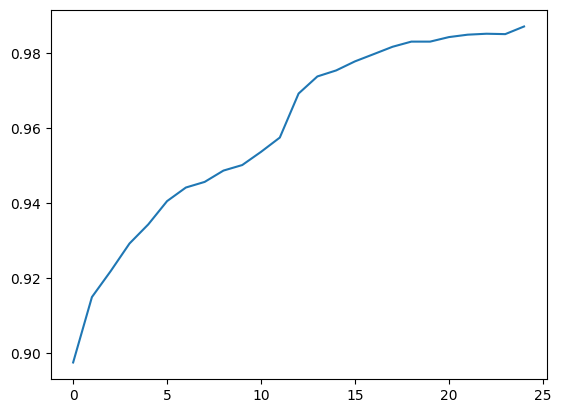

In [ ]:
plt.plot(train_model.history['accuracy'])

*Plotting validation accuracy over epochs*

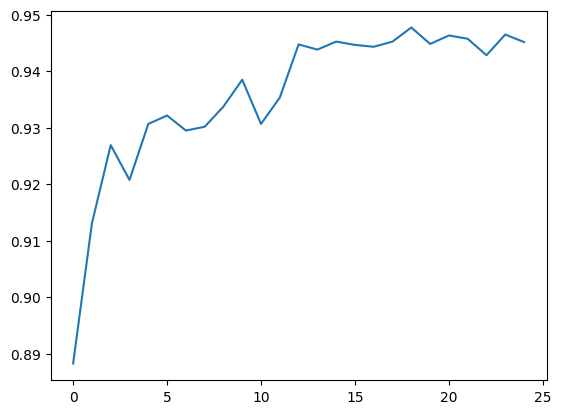

In [ ]:
plt.plot(train_model.history['val_accuracy'])

*Plotting training loss over epochs*

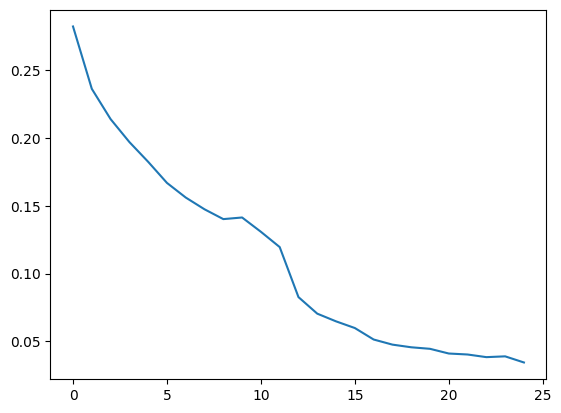

In [ ]:
plt.plot(train_model.history['loss'])

*Plotting validation loss over epochs*

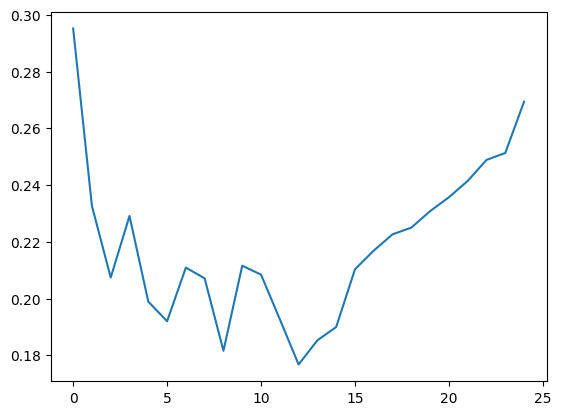

In [ ]:
plt.plot(train_model.history['val_loss'])

In [ ]:
# Predict class probabilities for test data
predicted_probabilities = model.predict(test_images)

# Determine predicted classes based on probabilities
predictions = np.argmax(predicted_probabilities, axis=1)

print(predictions.shape)


313/313 [==============================] - 64s 202ms/step
(10000,)


*Getting the actual class labels from one-hot encoded test labels*

In [ ]:
actual=np.argmax(test_labels,axis=1)
print(actual.shape)

(10000,)


* *Counting the number of correct predictions and calculating test accuracy;*
* *Printing the number of correct predictions and test accuracy;*
* *The expected test accuracy should ideally be greater than 93%.*

In [ ]:
s=0
for i in range(10000):
  if(predictions[i]==actual[i]):
    s+=1

print(s)
print("Test Accuracy:",float(s/10000))

9400
Test Accuracy: 0.94
